In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('../clean_data/after_clean.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data['Year'] = data['Year'].astype(str)
data.head()

,Year,Jurisdiction,Gender,Average scale score
0,2022,National,Male,214.0
1,2022,National,Female,221.0
2,2022,Alabama,Male,208.0
3,2022,Alabama,Female,218.0
4,2022,Alaska,Male,197.0


In [4]:
pivot_table = data.pivot_table(
    values='Average scale score', 
    index=['Jurisdiction', 'Year'], 
    columns='Gender'
    #,aggfunc='first'
)

# Calculating the gap between Female and Male values
pivot_table['Gap'] = pivot_table['Male'] - pivot_table['Female']

pivot_table.to_csv('../clean_data/gap.csv')

In [5]:
pivot_table

Gender             Female   Male  Gap
Jurisdiction Year                    
Alabama      2002   211.0  203.0 -8.0
             2003   211.0  204.0 -7.0
             2005   211.0  205.0 -6.0
             2007   219.0  213.0 -6.0
             2009   221.0  212.0 -9.0
...                   ...    ...  ...
Wyoming      2013   229.0  223.0 -6.0
             2015   231.0  226.0 -5.0
             2017   230.0  224.0 -6.0
             2019   228.0  226.0 -2.0
             2022   226.0  223.0 -3.0

[561 rows x 3 columns]

In [6]:
states_1 = data['Jurisdiction'].unique()[:5]
states_2 = data['Jurisdiction'].unique()[5:10]
states_3 = data['Jurisdiction'].unique()[10:15]
states_4 = data['Jurisdiction'].unique()[15:20]
states_5 = data['Jurisdiction'].unique()[20:25]
states_6 = data['Jurisdiction'].unique()[25:30]
states_7 = data['Jurisdiction'].unique()[30:35]
states_8 = data['Jurisdiction'].unique()[35:40]
states_9 = data['Jurisdiction'].unique()[40:45]
states_10 = data['Jurisdiction'].unique()[45:50]
states_11= data['Jurisdiction'].unique()[50:]

In [7]:
def plot_state_gap(state):
    state_data = pivot_table.xs(state, level='Jurisdiction')['Gap']
    y_min, y_max = -10, 10
    plt.figure(figsize=(10, 6))
    plt.plot(state_data.index, state_data, marker='o', linestyle='-', label=f'Gap in {state}')
    plt.title(f'Gender Gap Over Years in {state}')
    plt.xlabel('Year')
    plt.ylabel('Gap (Male - Female)')
    plt.ylim(y_min,y_max)
    plt.grid(True)
    plt.legend()
    plt.style.use('my_style')
    plt.show()

# Plotting the gap for the first state in the sample
def ploting(states):
    i=1
    for i in range(len(states)):
        plot_state_gap(states[i])
        i+=1

In [8]:
import matplotlib.pyplot as plt

def plotting(states):
    plt.style.use('my_style')  # Apply the style at the beginning
    
    # Determine the number of subplots needed: one for each state
    n_states = len(states)
    
    # Create subplots with a shared y-axis (if desired), arranged in a row
    fig, axs = plt.subplots(1, n_states, figsize=(5 * n_states, 5), sharey=True)
    
    # If there's only one state, axs might not be an array, so we put it in a list
    if n_states == 1:
        axs = [axs]
    
    for i, state in enumerate(states):
        state_data = pivot_table.xs(state, level='Jurisdiction')['Gap']
        axs[i].plot(state_data.index, state_data, marker='o', linestyle='-', label=f'Gap in {state}')
        axs[i].set_title(f'Gender Gap Over Years in {state}')
        axs[i].set_xlabel('Year')
        if i == 0:  # Only add y-label to the first plot to avoid repetition
            axs[i].set_ylabel('Gap (Male - Female)')
        axs[i].set_ylim(-10, 10)
        axs[i].grid(True)
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Make sure to define 'pivot_table' and 'states' before calling this function.
# plotting(states, pivot_table)


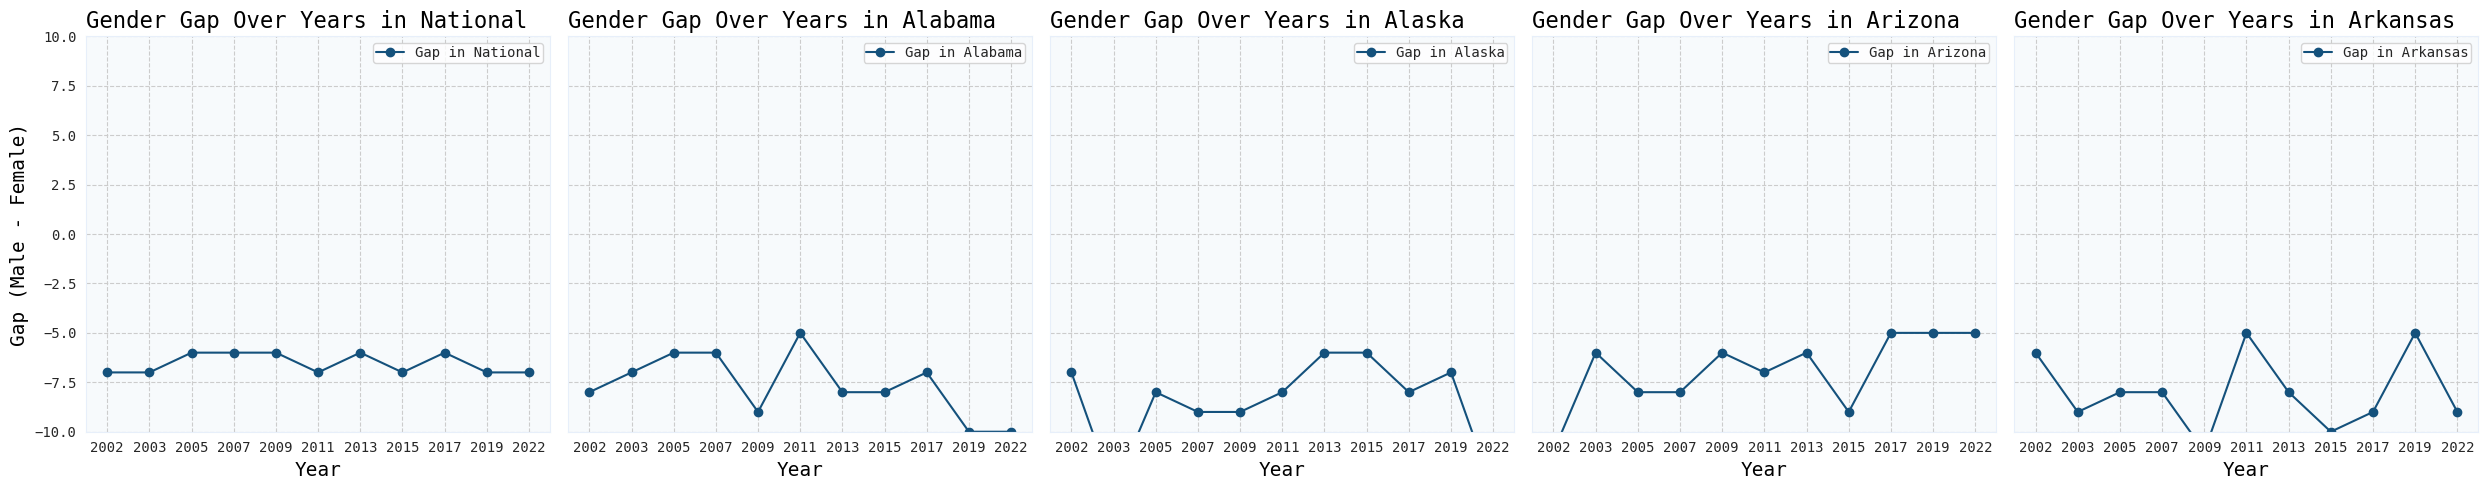

In [9]:
plotting(states_1)

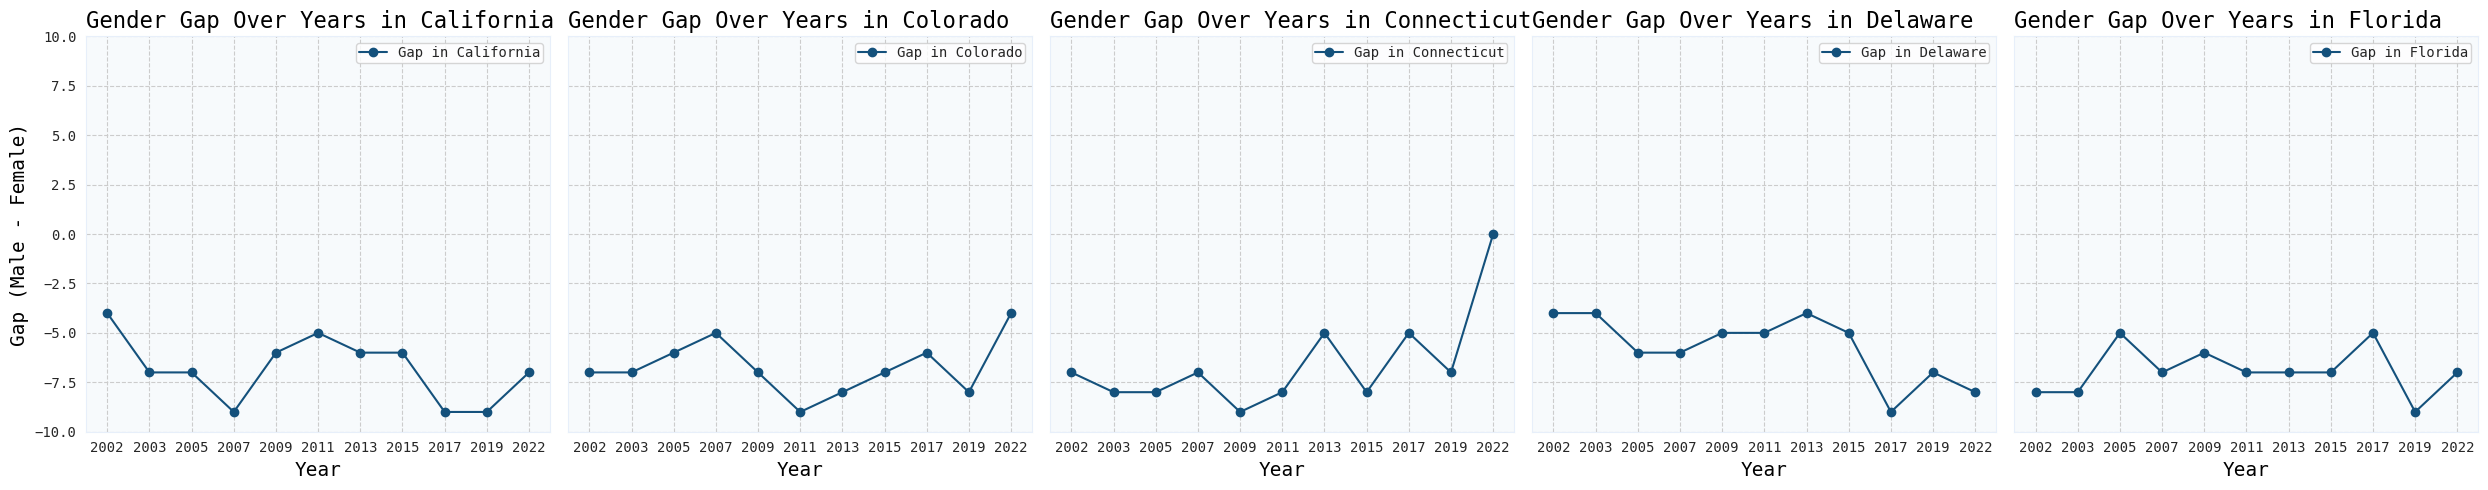

In [10]:
plotting(states_2)

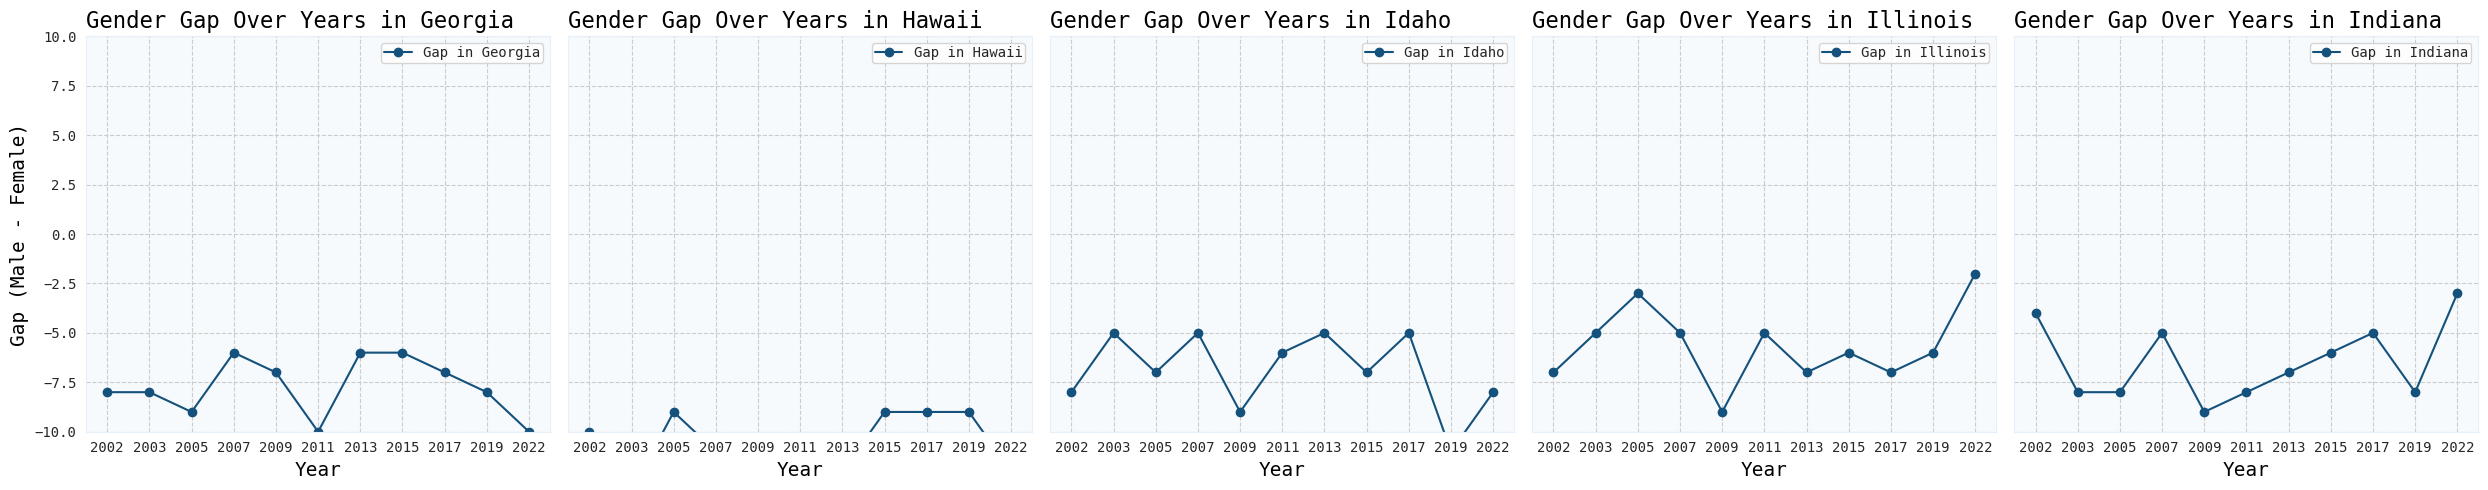

In [11]:
plotting(states_3)

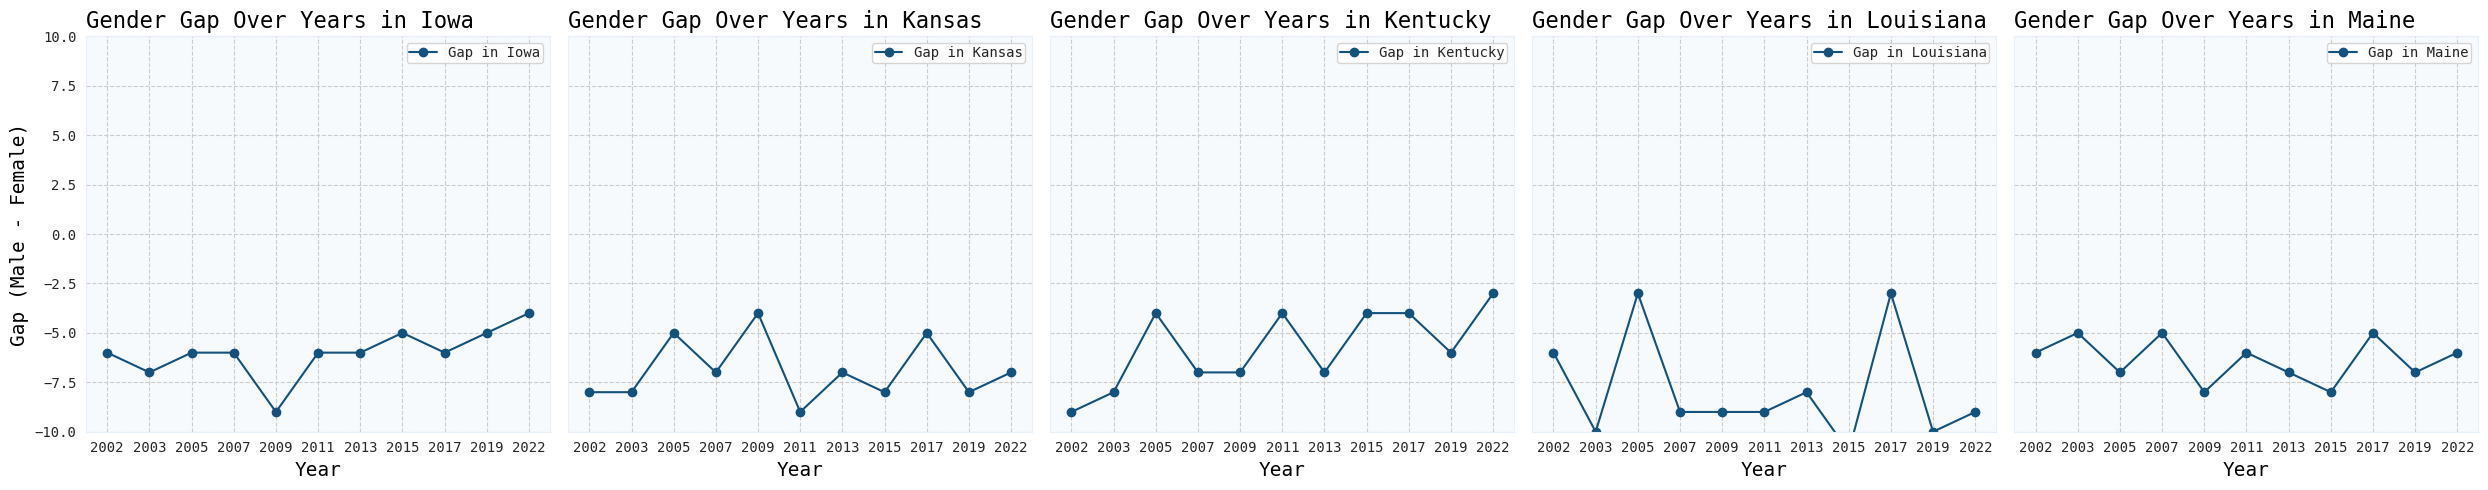

In [12]:
plotting(states_4)

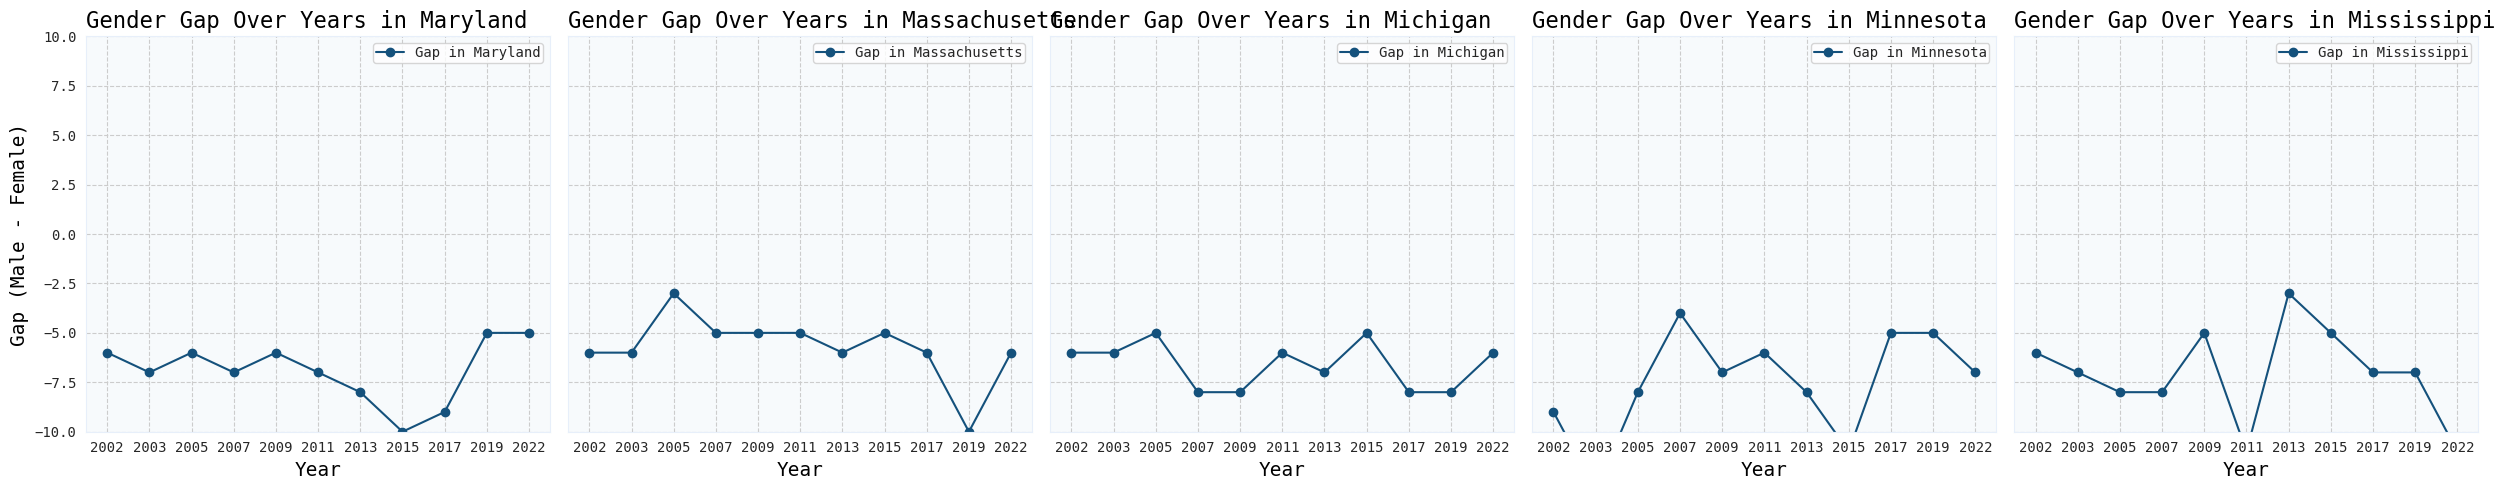

In [13]:
plotting(states_5)

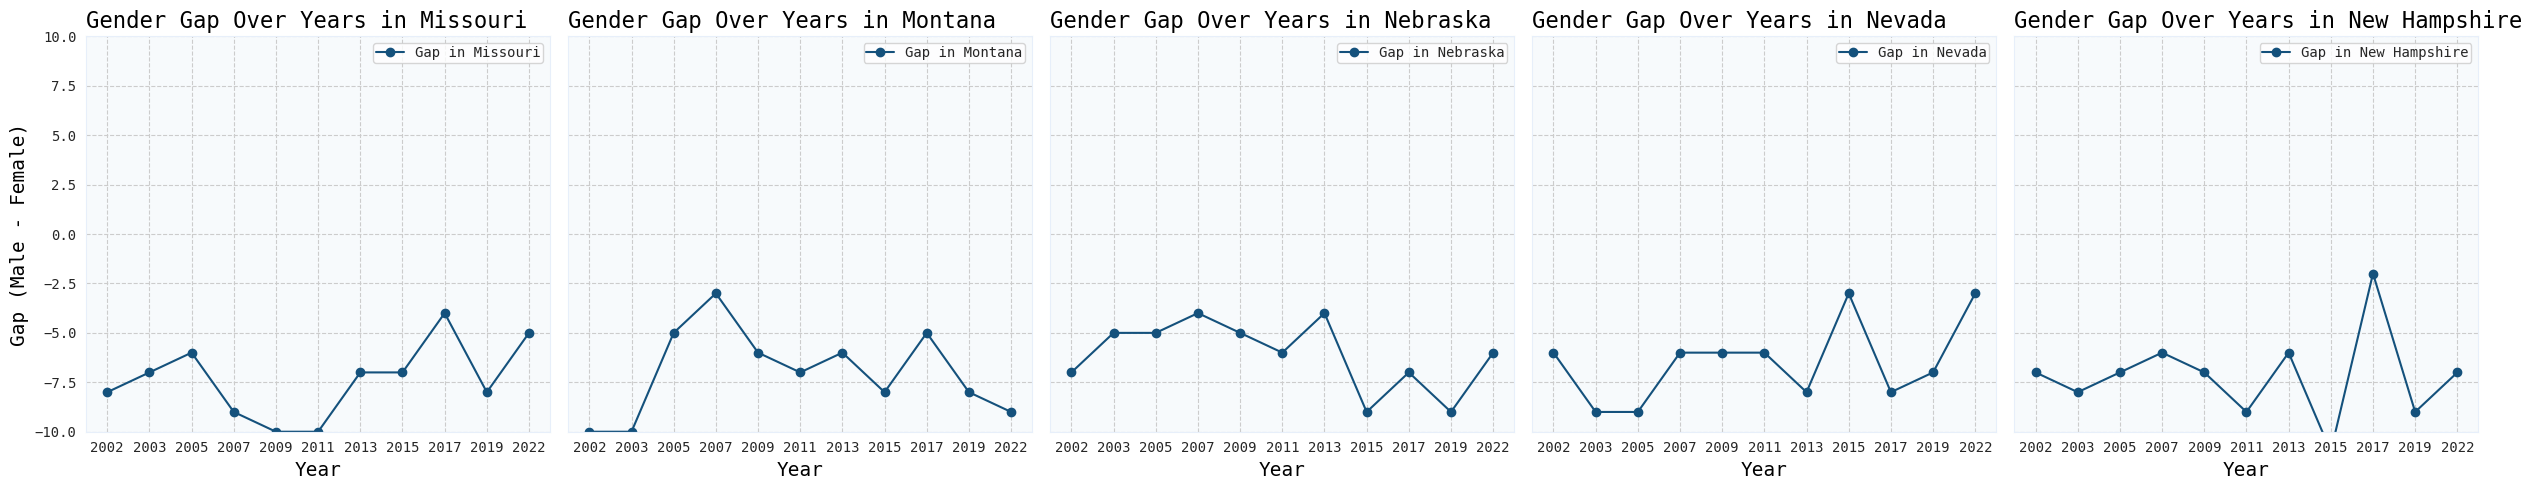

In [14]:
plotting(states_6)

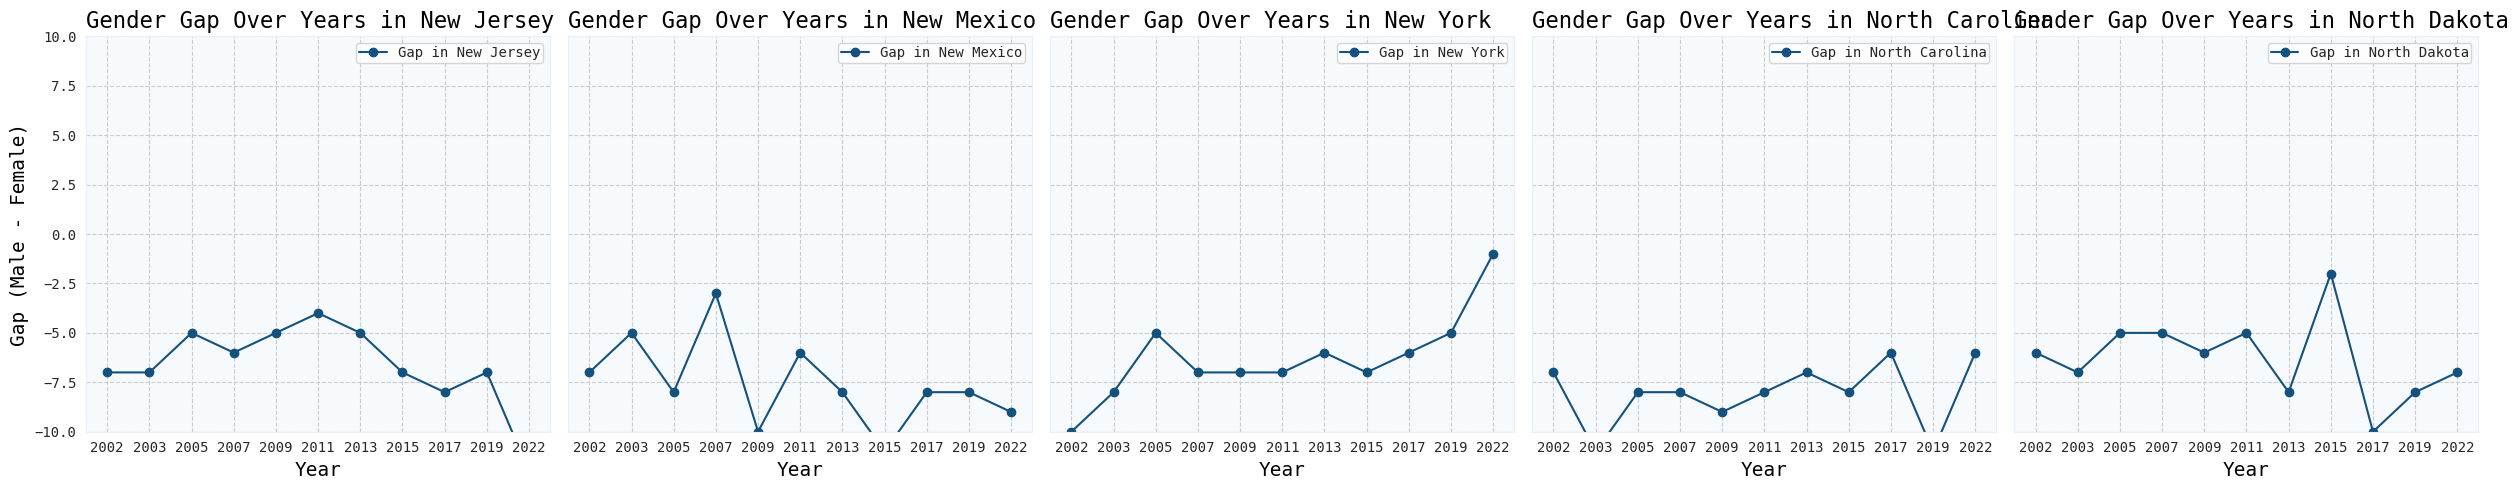

In [15]:
plotting(states_7)

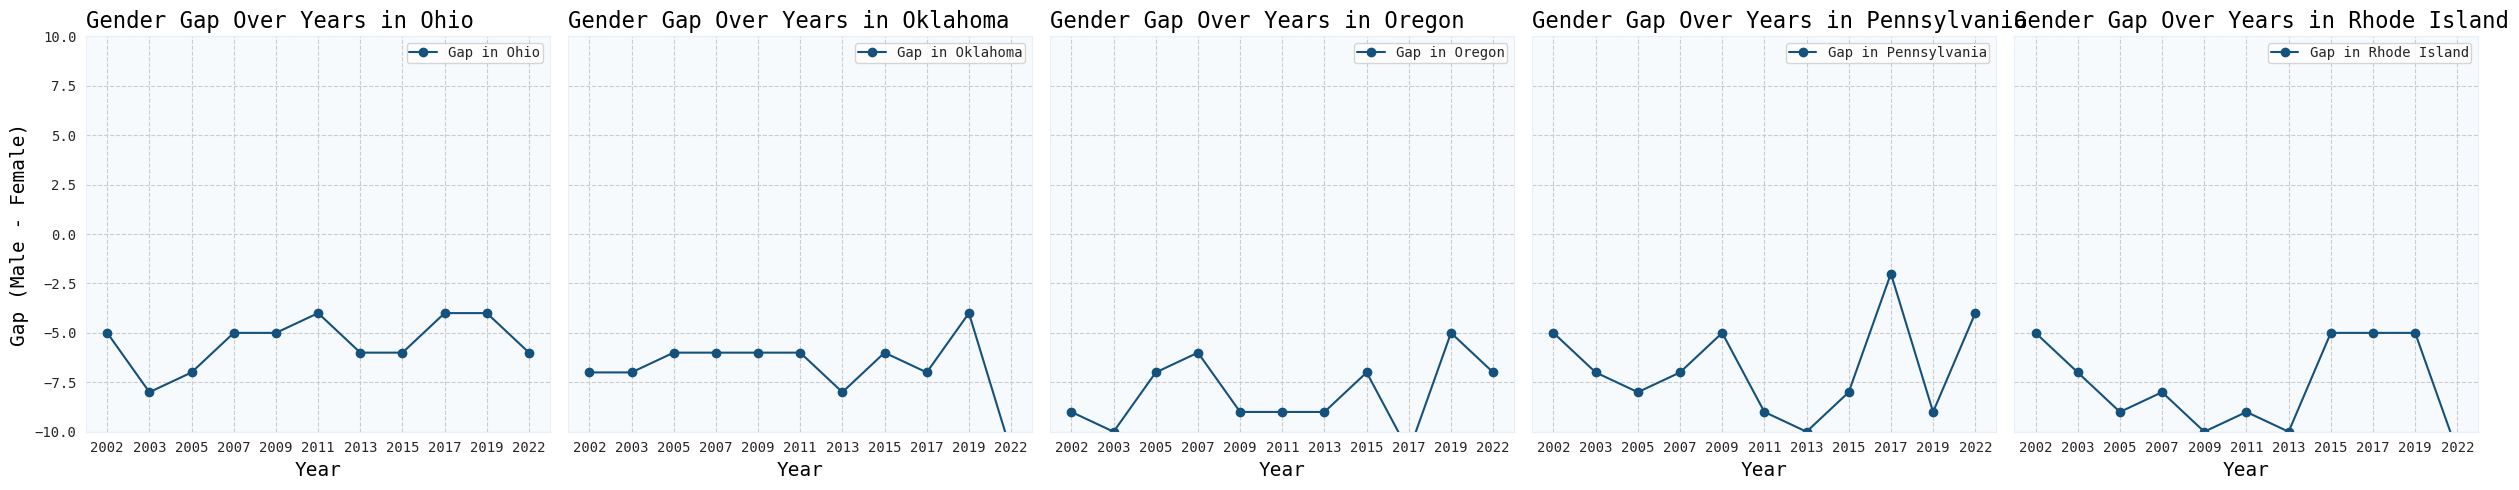

In [16]:
plotting(states_8)

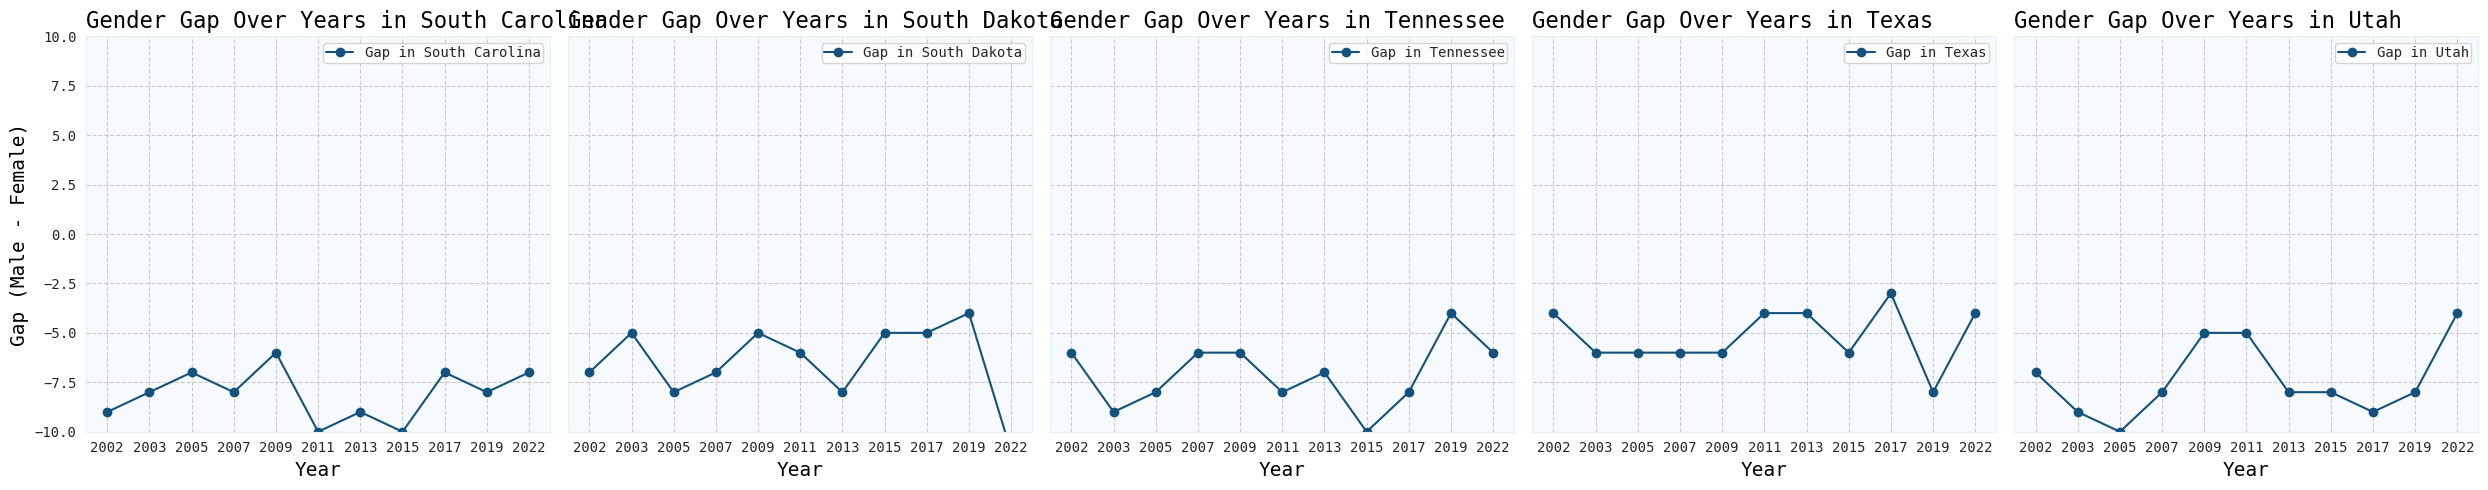

In [17]:
plotting(states_9)

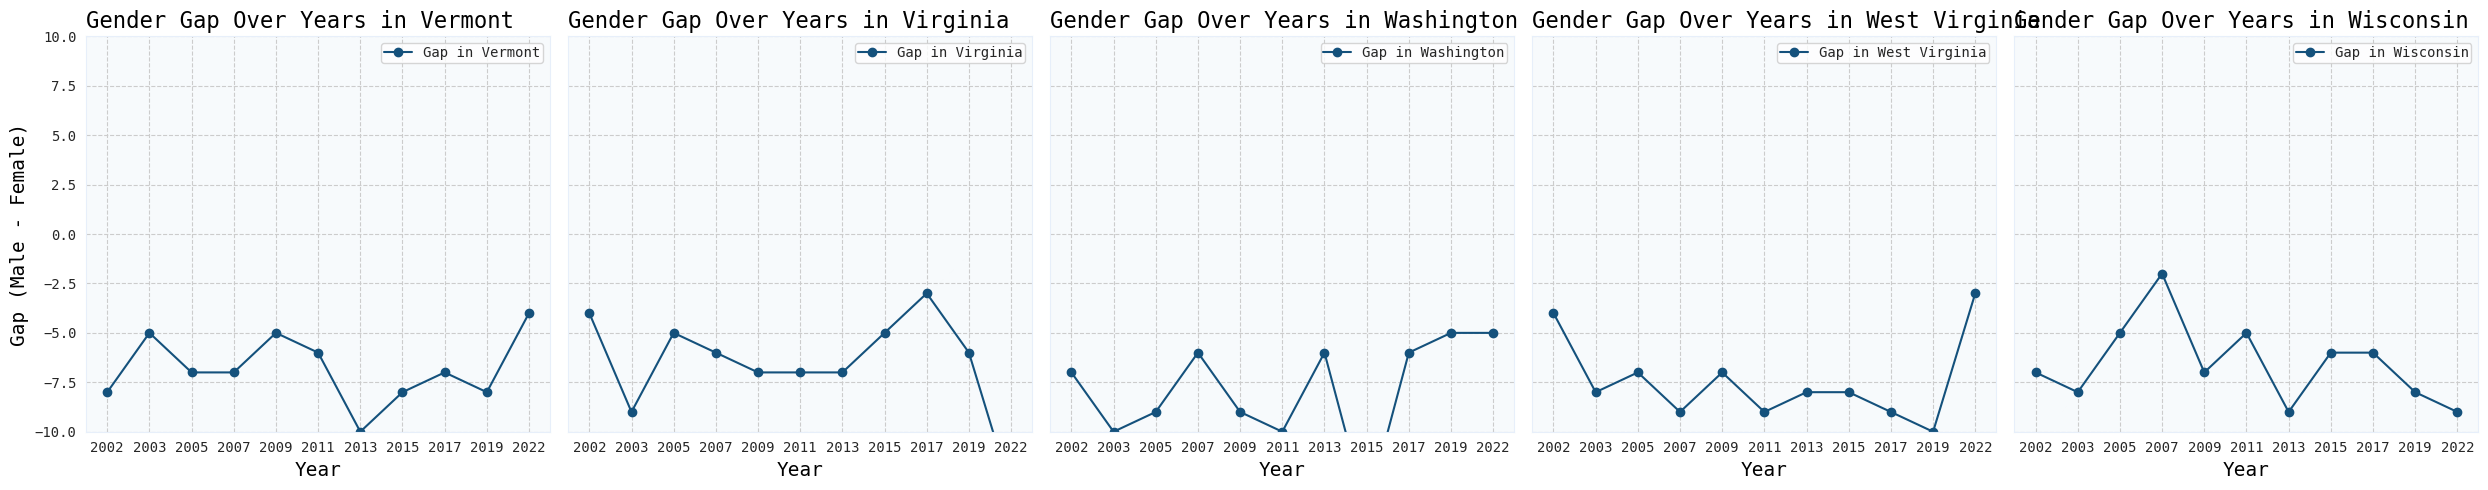

In [18]:
plotting(states_10)

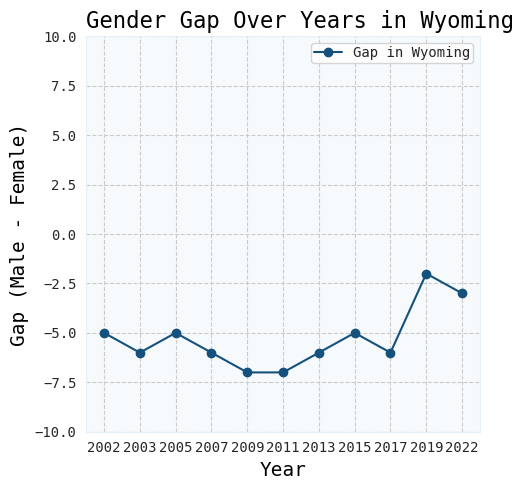

In [19]:
plotting(states_11)

In [20]:
import matplotlib.pyplot as plt
import numpy as np  # Assuming you're using numpy for data manipulation

def plot_all(states):
    plt.style.use('my_style')  # Apply the custom style

    # Calculate the number of rows needed for 5 states per row
    n_rows = int(np.ceil(len(states) / 5))
    
    # Create subplots with a shared y-axis (if desired), arranged in rows and columns
    fig, axs = plt.subplots(n_rows, 5, figsize=(25, 5 * n_rows), sharey=True, constrained_layout=True)
    
    # Flatten axs array for easy iteration if it's 2D (which it will be if n_rows > 1)
    axs = axs.flatten()
    
    for i, state in enumerate(states):
        state_data = pivot_table.xs(state, level='Jurisdiction')['Gap']
        axs[i].plot(state_data.index, state_data, marker='o', linestyle='-', label=f'Gap in {state}')
        axs[i].set_title(f'Gender Gap Over Years in {state}')
        axs[i].set_xlabel('Year')
        if i % 5 == 0:  # Add y-label only to the first plot in each row to avoid repetition
            axs[i].set_ylabel('Gap (Male - Female)')
        axs[i].set_ylim(-10, 10)
        axs[i].grid(True)
        axs[i].legend()
    
    # Hide any unused subplots if the total number of states is not a multiple of 5
    for ax in axs[len(states):]:
        ax.set_visible(False)

    plt.show()


In [23]:
states_all = data['Jurisdiction'].unique()

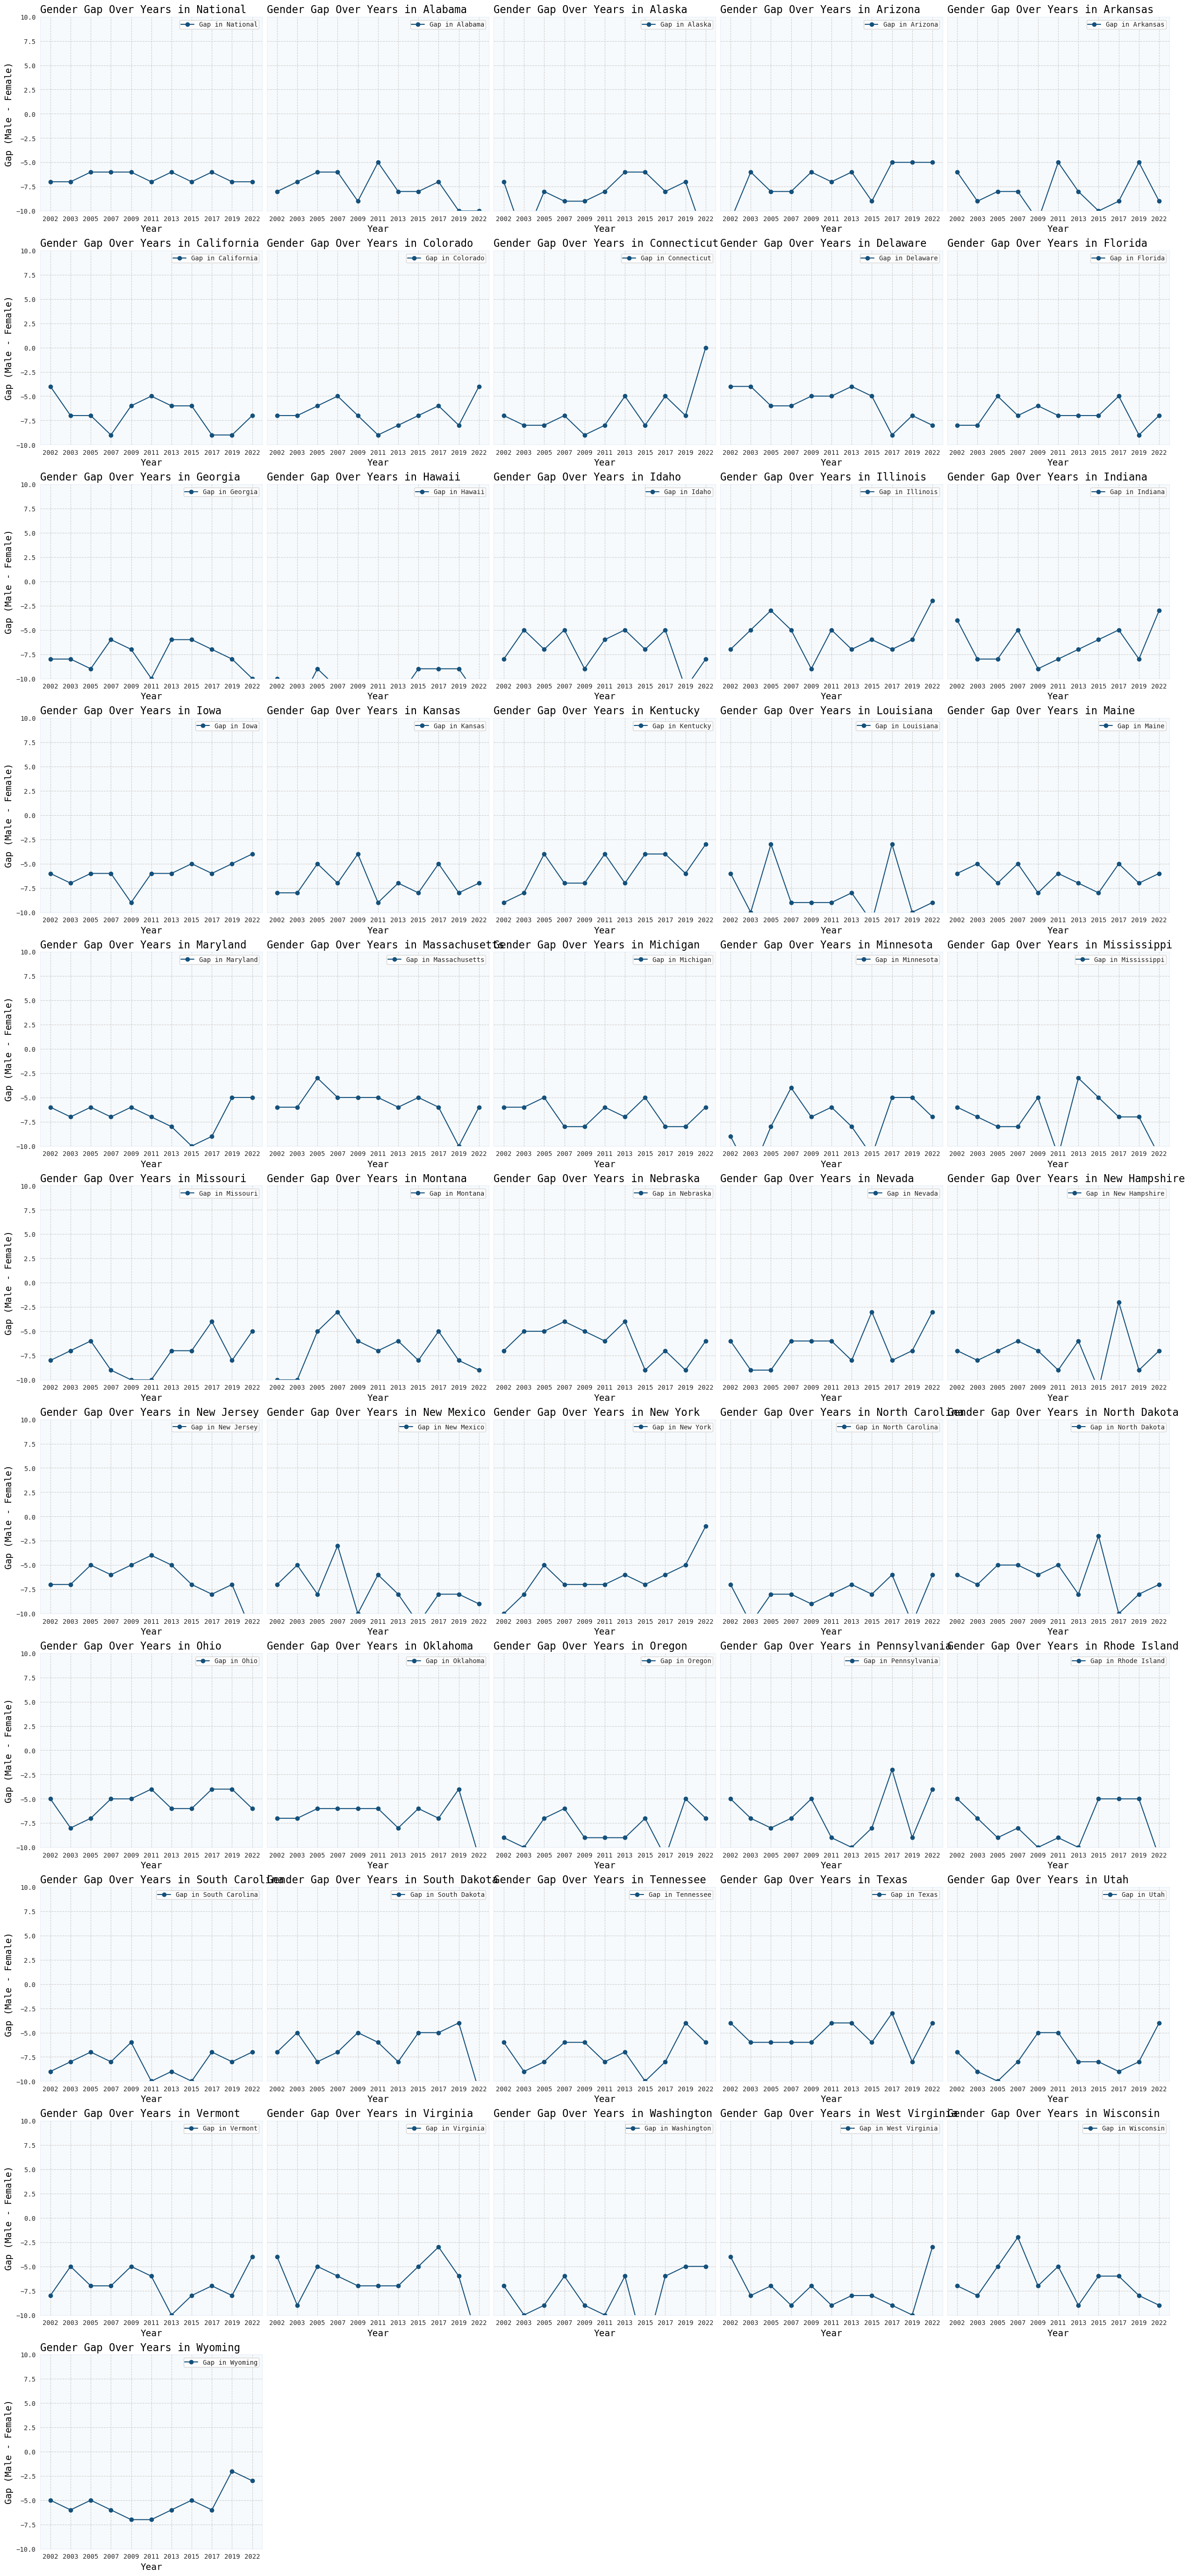

In [22]:
plot_all(states_all)